## Problem statement : Will the Customer pay the financing or not?

### About Credit risk Dataset
Data Set name : Credit risk

    Data collected by : Murilão
    Dataset characteristics : Multivariate
    DATASET DOWNLOADED FROM KAGGLE
Link : https://www.kaggle.com/upadorprofzs/credit-risk

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
credit_df= pd.read_csv('Credit_risk_assesment.csv')

### Displaying Dataset

In [4]:
credit_df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


### Attributes information

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
credit_df.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

In [46]:
credit_df.shape

(2000, 5)

### No. of Samples in each class

In [5]:
credit_df['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

In [6]:
# Get the Risk and the Normal dataset

risk = credit_df[credit_df['default']==1]

normal = credit_df[credit_df['default']==0]

In [49]:
print(risk.shape,normal.shape)

(283, 5) (1717, 5)


In [11]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
risk.loan.describe()

count      283.000000
mean      7272.856747
std       2581.177563
min       2495.132991
25%       5445.171674
50%       7181.478553
75%       9037.108179
max      13376.797710
Name: loan, dtype: float64

In [50]:
normal.loan.describe()

count     1717.000000
mean      3978.171771
std       2858.725004
min          1.377630
25%       1707.672870
50%       3447.002152
75%       5757.848995
max      13766.051240
Name: loan, dtype: float64

In [8]:
outlier_fraction = len(risk)/float(len(normal))

In [9]:
print(outlier_fraction)

print("Risk Cases : {}".format(len(risk)))

print("Normal Cases : {}".format(len(normal)))

0.1648223645894001
Risk Cases : 283
Normal Cases : 1717


In [53]:
normal.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
5,6,24904.06414,57.471607,15.498598,0


In [54]:
risk.head()

,clientid,income,age,loan,default
4,5,66952.68885,18.584336,8770.099235,1
7,8,24500.14198,32.897548,2971.003310,1
39,40,26578.53669,32.676044,3489.843136,1
43,44,24381.95345,25.252331,4227.018986,1
56,57,22248.17920,23.443624,4364.975281,1


### Data Cleaning

In [10]:
#Drop the column "clientid" because it is of no use.
credit_df= credit_df.drop('clientid',axis=1)

normal= normal.drop('clientid',axis=1)

risk= risk.drop('clientid',axis=1)

#### Displaying updated dataset 

In [56]:
credit_df.head(10)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
5,24904.06414,57.471607,15.498598,0
6,48430.35961,26.809132,5722.581981,0
7,24500.14198,32.897548,2971.003310,1
8,40654.89254,55.496853,4755.825280,0
9,25075.87277,39.776378,1409.230371,0


##### Checking for missing values  :

#### Checking for missing values in NORMAL transactions 

In [57]:
#Checking for missing values
normal.isnull()

,income,age,loan,default
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
5,False,False,False,False
...,...,...,...,...
1994,False,False,False,False
1995,False,False,False,False
1996,False,False,False,False
1998,False,False,False,False


In [58]:
#Checking for missing values
risk.isnull()

,income,age,loan,default
4,False,False,False,False
7,False,False,False,False
39,False,False,False,False
43,False,False,False,False
56,False,False,False,False
...,...,...,...,...
1964,False,False,False,False
1966,False,False,False,False
1983,False,False,False,False
1989,False,False,False,False


In [59]:
#method 2 : Checking for missing values
normal.isnull().sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [60]:
#To know indices of missing values
normal[normal['age'].isnull()].index.tolist()

[28, 30, 31]

In [11]:
#Filling missing values with mean of that column
normal= normal.fillna(normal["age"].mean())

In [12]:
#Checking if there still exist any missing values
normal.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

### Checking for missing values in RISK transactions 

In [63]:
#Checking for missing values
risk.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

#### Checking for Outliers [Normal transactions]

<AxesSubplot:xlabel='income'>

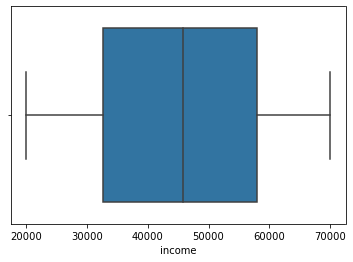

In [64]:
sns.boxplot(normal.income)

<AxesSubplot:xlabel='age'>

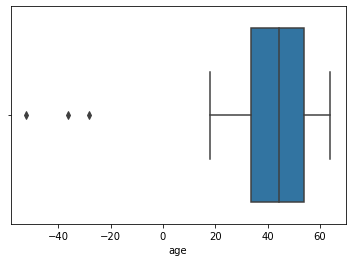

In [65]:
sns.boxplot(normal.age)

<AxesSubplot:xlabel='loan'>

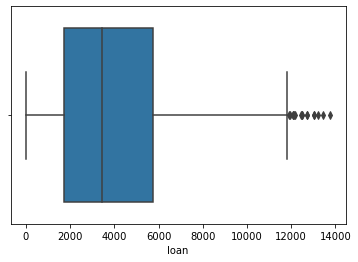

In [66]:
sns.boxplot(normal.loan)

     Fig 1 :- This is the Outlier situation

In [67]:
normal.age.describe()

count    1717.000000
mean       43.186171
std        13.126897
min       -52.423280
25%        33.755632
50%        44.356090
75%        53.896818
max        63.971796
Name: age, dtype: float64

[ Note :- As 'min value' is so far from 1st quartile thus we have Outlier situation here. ]

In [7]:
normal.loan.describe()

count     1717.000000
mean      3978.171771
std       2858.725004
min          1.377630
25%       1707.672870
50%       3447.002152
75%       5757.848995
max      13766.051240
Name: loan, dtype: float64

[ Note :- As 'max value' is so far from 3rd quartile thus we have Outlier situation here. ]

#### Outlier treatment

In [69]:
#If the Outlier value is > age_q3 value, then we can replace it with age_q3 value and
#if the Outlier value is < age_q1 value, then we can replace it with age_q1 value.

normal["age"] = np.where(normal["age"] <=33.755632, 33.755632,normal['age'])

<AxesSubplot:xlabel='age'>

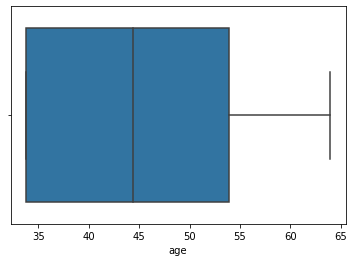

In [70]:
sns.boxplot(normal.age)

In [71]:
#If the Outlier value is > loan_q3 value, then we can replace it with loan_q3 value and
#if the Outlier value is < loan_q1 value, then we can replace it with loan_q1 value.

normal["loan"] = np.where(normal["loan"] >=5757.848995, 5757.848995,normal['loan'])

<AxesSubplot:xlabel='loan'>

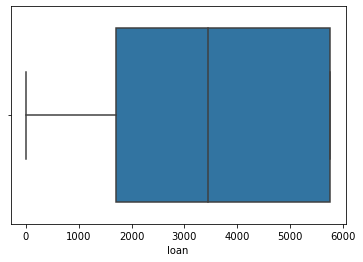

In [72]:
sns.boxplot(normal.loan)

### Checking for Outliers [Risk transactions]

<AxesSubplot:xlabel='income'>

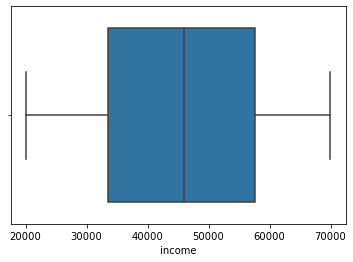

In [73]:
sns.boxplot(risk.income)

<AxesSubplot:xlabel='age'>

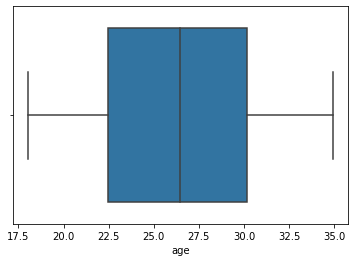

In [38]:
sns.boxplot(risk.age)

<AxesSubplot:xlabel='loan'>

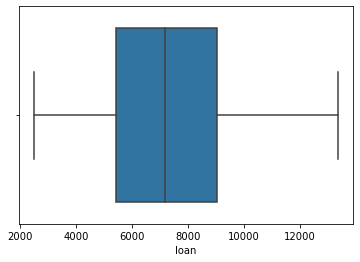

In [37]:
sns.boxplot(risk.loan)

### Calculating Mean of all the attributes 

In [35]:
normal.mean()

income     45318.317216
age           43.186171
loan        3417.568673
default        0.000000
dtype: float64

In [36]:
risk.mean()

income     45412.188607
age           26.401412
loan        7272.856747
default        1.000000
dtype: float64

### Calculating Median of all the attributes 

In [37]:
normal.median()

income     45783.154750
age           44.375114
loan        3447.002152
default        0.000000
dtype: float64

In [38]:
risk.median()

income     45980.334340
age           26.449337
loan        7181.478553
default        1.000000
dtype: float64

### Calculating Mode of all the attributes 

In [39]:
normal.mode()

,income,age,loan,default
0,20014.48947,-52.423280,5757.848995,0.0
1,20111.36326,-36.496976,NaN,NaN
2,20126.41377,-28.218361,NaN,NaN
3,20145.98860,18.055189,NaN,NaN
4,20155.79236,18.130038,NaN,NaN
...,...,...,...,...
1712,69852.05872,63.930735,NaN,NaN
1713,69929.01100,63.971796,NaN,NaN
1714,69939.32968,NaN,NaN,NaN
1715,69992.33271,NaN,NaN,NaN


In [40]:
risk.mode()

,income,age,loan,default
0,20063.09958,18.055874,2495.132991,1.0
1,20113.25349,18.075336,2507.649710,NaN
2,20252.12346,18.176043,2639.710126,NaN
3,20258.53866,18.309746,2690.768134,NaN
4,20622.86010,18.393830,2767.837300,NaN
...,...,...,...,...
278,69395.11648,34.700990,12731.894640,NaN
279,69445.64945,34.751438,12840.696710,NaN
280,69478.39876,34.795263,12972.418360,NaN
281,69695.15045,34.831361,13172.681300,NaN


### Range

In [43]:
normal_income_min= normal['income'][normal['income'].idxmin()]
normal_income_max= normal['income'][normal['income'].idxmax()]
normal_income_range= normal_income_max-normal_income_min
print("Range of normal income :",round(normal_income_range, 1))

normal_age_min= normal['age'][normal['age'].idxmin()]
normal_age_max= normal['age'][normal['age'].idxmax()]
normal_age_range= normal_age_max-normal_age_min
print("Range of normal age :",round(normal_age_range, 1))

normal_loan_min= normal['loan'][normal['loan'].idxmin()]
normal_loan_max= normal['loan'][normal['loan'].idxmax()]
normal_loan_range= normal_loan_max-normal_loan_min
print("Range of normal loan :",round(normal_loan_range, 1))


Range of normal income : 49981.2
Range of normal_age : 116.4
Range of normal loan : 5756.5


In [48]:
risk_income_min= risk['income'][risk['income'].idxmin()]
risk_income_max= risk['income'][risk['income'].idxmax()]
risk_income_range= risk_income_max-risk_income_min
print("Range of risk income :",round(risk_income_range, 1))

risk_age_min= risk['age'][risk['age'].idxmin()]
risk_age_max= risk['age'][risk['age'].idxmax()]
risk_age_range= risk_age_max-risk_age_min
print("Range of risk age :",round(risk_age_range, 1))

risk_loan_min= risk['loan'][risk['loan'].idxmin()]
risk_loan_max= risk['loan'][risk['loan'].idxmax()]
risk_loan_range= risk_loan_max-risk_loan_min
print("Range of risk loan :",round(risk_loan_range, 1))


Range of risk income : 49895.6
Range of risk age : 16.9
Range of risk loan : 10881.7


### Interquartile range

In [36]:
normal.describe()

,income,age,loan,default
count,1717.000000,1717.000000,1717.000000,1717.0
mean,45318.317216,45.286133,3417.568673,0.0
std,14318.556075,9.898012,1945.740265,0.0
min,20014.489470,33.755632,1.377630,0.0
25%,32657.268680,33.755632,1707.672870,0.0
50%,45783.154750,44.356090,3447.002152,0.0
75%,57914.731070,53.896818,5757.848995,0.0
max,69995.685580,63.971796,5757.848995,0.0


In [48]:
normal_income_q1= 32657.268680
normal_income_q3= 57914.731070

normal_age_q1= 33.755632
normal_age_q3= 53.896818

normal_loan_q1= 1707.672870
normal_loan_q3= 5757.848995	

In [50]:
print("IQR of normal income :",round(normal_income_q3-normal_income_q1, 1))
print("IQR of normal age :",round(normal_age_q3-normal_age_q1, 1))
print("IQR of normal loan :",round(normal_loan_q3-normal_loan_q1, 1))

IQR of normal income : 25257.5
IQR of normal age : 20.1
IQR of normal loan : 4050.2


In [83]:
#2nd method to find interquartile range using percentile.
# First quartile (Q1) 
Q1 = np.percentile(normal.income, 25, interpolation = 'midpoint') 
  
    # Third quartile (Q3) 
Q3 = np.percentile(normal.income, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
  
print("IQR of normal income :",round(IQR, 1) )

IQR of normal income : 25257.5


In [51]:
risk.describe()

,income,age,loan,default
count,283.000000,283.000000,283.000000,283.0
mean,45412.188607,26.401412,7272.856747,1.0
std,14398.556175,4.758752,2581.177563,0.0
min,20063.099580,18.055874,2495.132991,1.0
25%,33438.770040,22.485092,5445.171674,1.0
50%,45980.334340,26.449337,7181.478553,1.0
75%,57544.413625,30.149933,9037.108179,1.0
max,69958.705540,34.915516,13376.797710,1.0


In [52]:
risk_income_q1= 33438.770040
risk_income_q3= 57544.413625

risk_age_q1= 22.485092
risk_age_q3= 30.149933

risk_loan_q1= 5445.171674
risk_loan_q3= 9037.108179	

In [53]:
print("IQR of risk income :",round(risk_income_q3-risk_income_q1, 1))
print("IQR of risk age :",round(risk_age_q3-risk_age_q1, 1))
print("IQR of risk loan :",round(risk_loan_q3-risk_loan_q1, 1))

IQR of risk income : 24105.6
IQR of risk age : 7.7
IQR of risk loan : 3591.9


IQR of normal loan : 4050.1761250000004


### Variance

In [54]:
np.var(normal)

income     2.049016e+08
age        1.722151e+02
loan       8.167549e+06
default    0.000000e+00
dtype: float64

In [55]:
np.var(risk)

income     2.065858e+08
age        2.256570e+01
loan       6.638935e+06
default    0.000000e+00
dtype: float64

### Covariance

In [56]:
normal.cov()

,income,age,loan,default
income,2.050210e+08,-6560.020211,9.786205e+06,0.0
age,-6.560020e+03,172.617213,4.777697e+03,0.0
loan,9.786205e+06,4777.696764,3.785905e+06,0.0
default,0.000000e+00,0.000000,0.000000e+00,0.0


In [57]:
risk.cov()

,income,age,loan,default
income,2.073184e+08,-5369.001284,3.356706e+07,0.0
age,-5.369001e+03,22.645725,-8.879744e+02,0.0
loan,3.356706e+07,-887.974367,6.662478e+06,0.0
default,0.000000e+00,0.000000,0.000000e+00,0.0


### Correlation coefficient 

In [58]:
normal.corr(method= 'pearson')

,income,age,loan,default
income,1.000000,-0.034874,0.351261,NaN
age,-0.034874,1.000000,0.186838,NaN
loan,0.351261,0.186838,1.000000,NaN
default,NaN,NaN,NaN,NaN


In [59]:
risk.corr(method= 'pearson')

,income,age,loan,default
income,1.000000,-0.078358,0.903184,NaN
age,-0.078358,1.000000,-0.072292,NaN
loan,0.903184,-0.072292,1.000000,NaN
default,NaN,NaN,NaN,NaN


## Data Visualization

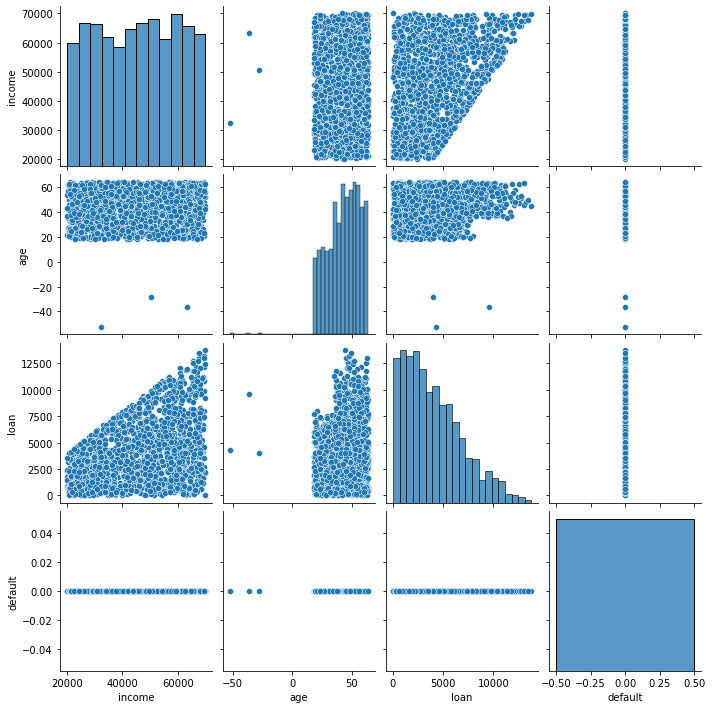

In [55]:
sns.pairplot(normal)

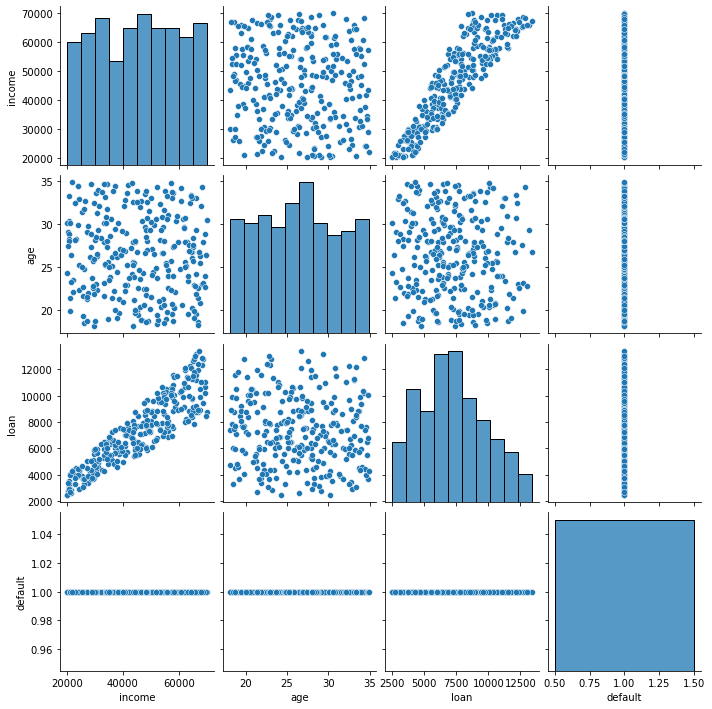

In [56]:
sns.pairplot(risk)

(array([[   0.,    0.,   28.,  234.,  240.,  228.,  244.,  245.,  269.,
          229.],
        [1717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([-5.24232799e+01,  6.95238761e+03,  1.39571985e+04,  2.09620094e+04,
         2.79668203e+04,  3.49716312e+04,  4.19764420e+04,  4.89812529e+04,
         5.59860638e+04,  6.29908747e+04,  6.99956856e+04]),
 <a list of 4 BarContainer objects>)

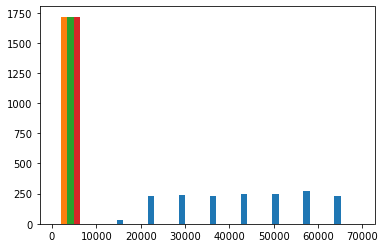

In [10]:
plt.hist(normal)

(array([[  0.,   0.,  10.,  31.,  42.,  35.,  46.,  40.,  35.,  44.],
        [283.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [138., 145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [283.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.00000000e+00, 6.99677055e+03, 1.39925411e+04, 2.09883117e+04,
        2.79840822e+04, 3.49798528e+04, 4.19756233e+04, 4.89713939e+04,
        5.59671644e+04, 6.29629350e+04, 6.99587055e+04]),
 <a list of 4 BarContainer objects>)

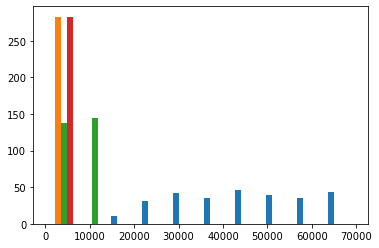

In [11]:
plt.hist(risk)

### Q2. Categorize the following given data according to nominal, ordinal, interval or ratio data? Explain your answers.
(a) Temperatures measured on the Kelvin scale
 -> Interval or ratio data
 
(b) Military ranks.
 -> Ordinal data
 
(c) Social security numbers.
 -> Nominal data
 
(d) Number of passengers on buses from Delhi to Mumbai.
 -> Nominal data
 
(e) Code numbers given to the religion of persons attempting suicide.
 -> Nominal data

### Q3. Enumerate the different methods of collecting data. Which one you prefer for conducting enquiry regarding family COVID vaccination programme in India? Explain its merits and demerits.
Ans:- Different methods of collecting data are :-

   (i) QUESTIONNAIRE METHOD :-
        A questionnaire is a research instrument consisting of a series of questions and other prompts for
        the purpose of gathering information from respondents. Although they are often designed for
        statistical analysis of the responses. Questionnaires have advantages over some other types of surveys
        in that they are cheap, do not require as much effort from the questioner as verbal or telephone
        surveys, and often have standardized answers that make it simple to compile data.As a type of
        survey, questionnaires also have many of the same problems relating to question construction and
        wording that exist in other types of opinion polls.
            
   (i) INTERVIEWS METHOD :-
        Interviewing involves asking questions and getting answers from participants in a study. Interviewing
        has a variety of forms including: individual, face-to-face interviews and face-to-face group
        interviewing. The asking and answering of questions can be mediated by the telephone or other
        electronic devices (e.g. mobile phones).
            
 (iii) OBSERVATIONAL METHOD :-
        Observation is a fundamental way of finding out about the world around us. As human beings, we are
        very well equipped to pick up detailed information about our environment through our senses.
        However, as a method of data collection for research purposes, observation is more than just
        looking or listening. Observation must in some way be selective.We are constantly bombarded by huge 
        amounts of sensory information. Human beings are good at selectively attending to what is perceived as
        most useful to us.
        
  (iv) SURVEY METHOD :-
        Survey research is often used to assess thoughts, opinions, and feelings. Survey research can be
        specific and limited, or it can have more global, widespread goals.A survey consists of a predetermined
        set of questions that is given to a sample. With a representative sample, that is, one that is representative 
        of the larger population of interest, one can describe the attitudes of the population from which the sample
        was drawn. A good sample selection is key as it allows one to generalize the findings from the sample to the
        population, which is the whole purpose of survey research. 
        
  (v) CASE STUDY METHOD :-
        Case studies are in-depth investigations of a single person, group, event or community. Typically data
        are gathered from a variety of sources and by using several different methods (e.g. observations &
        interviews). The case study method often involves simply observing what happens to,
        or reconstructing ‘the case history’ of a single participant or group of individuals (such as a school
        class or a specific social group).
        
   (vi) EXPERIMENTAL METHOD :-
        The prime method of inquiry in science is the experiment. The key features are control over
        variables, careful measurement, and establishing cause and effect relationships. An experiment is an
        investigation in which a hypothesis is scientifically tested. In an experiment, an independent variable
        (the cause) is manipulated and the dependent variable (the effect) is measured. An advantage is that 
        experiments should be objective. The views and opinions of the researcher should not affect the results
        of a study.This is good as it makes the data more valid, and less bias.
        
#### -> I prefer SURVEY METHOD for conducting enquiry regarding family COVID vaccination programme in India because it uses predetermined set of questions that is given to a sample and with the help of this we can determine how  badly the sample is affected by COVID and how badly it is at risk of contact with the virus.

### Q4. “It is never safe to take published statistics at their face value without knowing their meaning and limitations.” Elucidate this statement by enumerating and explaining the various points which you would consider before using any published data.

   Ans :-In my opinion, Due to various reason it is never safe to take published statistics at their face value without      knowing their meaning and limitations.They are :-

   (i) Data may be not reliable.
   
   (ii) It may not be adequate.
   
   (iii)It may not be suitable for our problem statement.
   
   (iv) There may be biasness in data.
   
   (v)  It may not be Cleaned properly. (Noisy Data) 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=credit_df[['income','age','loan']]

In [16]:
y=credit_df['default'] 

In [27]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y, train_size= 0.8, random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression

In [29]:
clf= LinearRegression()
clf.fit(train_X, train_Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
credit_df= credit_df.fillna(credit_df['income'].mean())

In [24]:
credit_df= credit_df.fillna(credit_df['age'].mean())

In [25]:
credit_df= credit_df.fillna(credit_df['loan'].mean())

In [28]:
np.any(np.isnan(train_X))

True